In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("../data/annotations/PolyA_DB3/human.PAS.txt", sep='\t')
df['PSE'] = df['PSE'].str.rstrip('%').astype('float') / 100

In [4]:
df.shape

(311594, 18)

In [5]:
df.head()

,PAS_ID,Chromosome,Position,Strand,Mean RPM,Intron/exon location,Ensemble ID,RefSeq Gene ID,Gene Symbol,Gene Name,FAMTOM ID,FANTOM Category,Extension,PAS type,PSE,PAS Signal,Conservation,intergenic_TE
0,chr1:564599:+,chr1,564599,+,3.333397,Single exon,ENSG00000225972,na,MTND1P23,mitochondrially encoded NADH:ubiquinone oxidor...,na,na,NO,Pseudogene,0.4953,NoPAS,No,NO
1,chr1:564629:+,chr1,564629,+,1.201574,Single exon,ENSG00000225972,na,MTND1P23,mitochondrially encoded NADH:ubiquinone oxidor...,na,na,NO,Pseudogene,0.0374,NoPAS,No,NO
2,chr1:564664:+,chr1,564664,+,14.856402,Single exon,ENSG00000225972,na,MTND1P23,mitochondrially encoded NADH:ubiquinone oxidor...,na,na,NO,Pseudogene,0.0467,NoPAS,No,NO
3,chr1:564708:+,chr1,564708,+,1.872293,Single exon,ENSG00000225972,na,MTND1P23,mitochondrially encoded NADH:ubiquinone oxidor...,na,na,NO,Pseudogene,0.0467,NoPAS,No,NO
4,chr1:564952:+,chr1,564952,+,1.991760,Single exon,ENSG00000225972,na,MTND1P23,mitochondrially encoded NADH:ubiquinone oxidor...,na,na,YES,Pseudogene,0.3271,NoPAS,No,NO


In [6]:
df.columns.to_list()

['PAS_ID',
 'Chromosome',
 'Position',
 'Strand',
 'Mean RPM',
 'Intron/exon location',
 'Ensemble ID',
 'RefSeq Gene ID',
 'Gene Symbol',
 'Gene Name',
 'FAMTOM ID',
 'FANTOM Category',
 'Extension',
 'PAS type',
 'PSE',
 'PAS Signal',
 'Conservation',
 'intergenic_TE']

No     262093
Yes     49501
Name: Conservation, dtype: int64

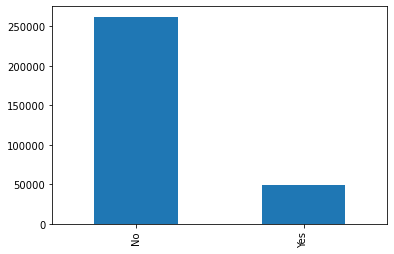

In [7]:
df['Conservation'].value_counts().plot(kind='bar')
df['Conservation'].value_counts()

Whether the PAS conserved in at least two mammals (human, mouse and rat)

<AxesSubplot:>

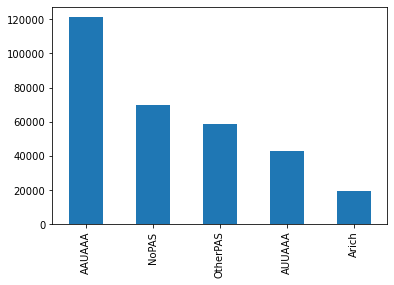

In [17]:
df['PAS Signal'].value_counts().plot(kind='bar')

Signal within 40nt upstream of pA site

<AxesSubplot:>

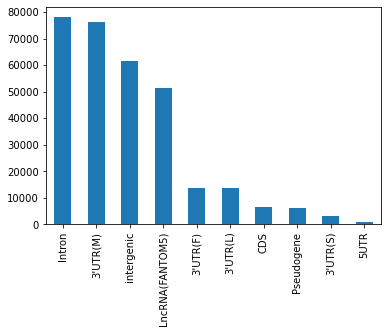

In [18]:
df['PAS type'].value_counts().plot(kind='bar')

<AxesSubplot:>

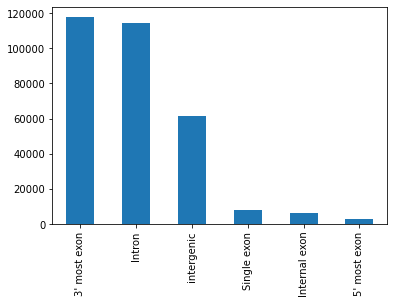

In [19]:
df['Intron/exon location'].value_counts().plot(kind='bar')

<AxesSubplot:>

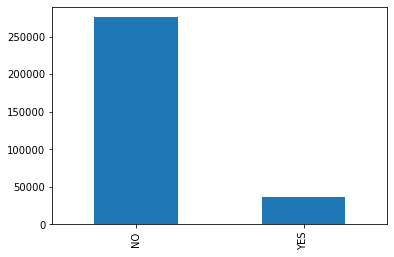

In [20]:
df['Extension'].value_counts().plot(kind='bar')

Beyond gene annotated region (RefSeq, Ensembl)

<AxesSubplot:>

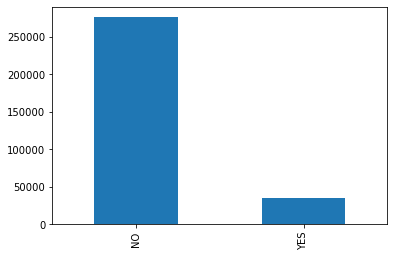

In [21]:
df['intergenic_TE'].value_counts().plot(kind='bar')

## RPM and PSE

In [22]:
plt.rcParams['figure.figsize'] = (8,6)
df['logRPM'] = np.log(df['Mean RPM'])

<AxesSubplot:xlabel='logRPM', ylabel='Count'>

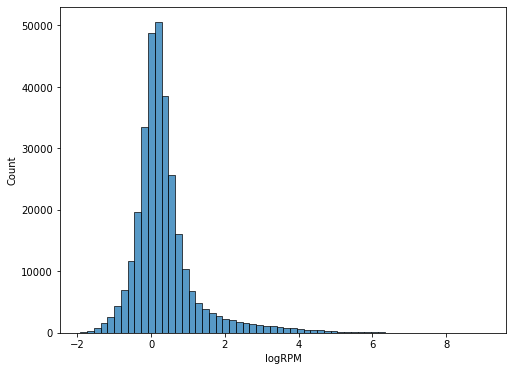

In [23]:
sns.histplot(df, x='logRPM', bins=60)

<AxesSubplot:xlabel='PSE', ylabel='Count'>

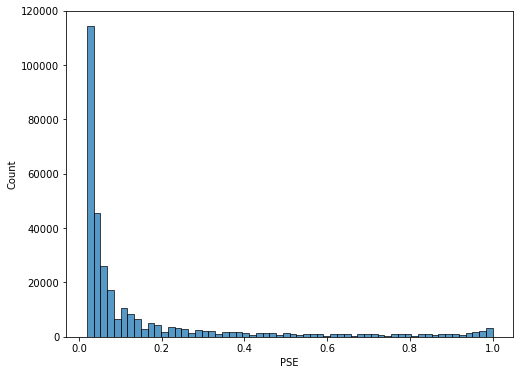

In [24]:
sns.histplot(df, x='PSE', bins=60)

<AxesSubplot:xlabel='Mean RPM', ylabel='PSE'>

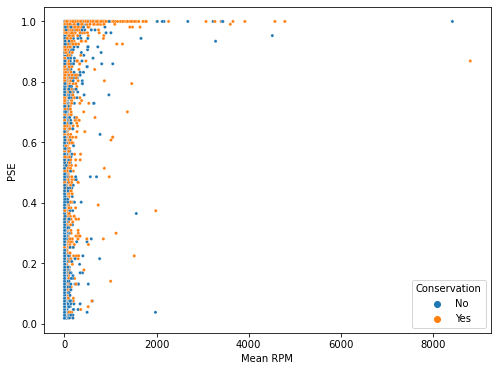

In [32]:
sns.scatterplot(data=df, x='Mean RPM', y='PSE', hue='Conservation', s=10, loc=)

<AxesSubplot:xlabel='logRPM', ylabel='PSE'>

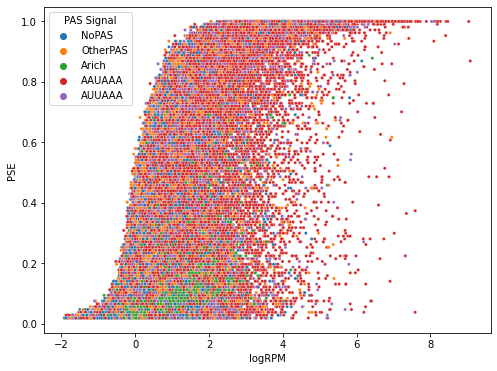

In [31]:
sns.scatterplot(data=df, x='logRPM', y='PSE', hue='PAS Signal', s=10)

<AxesSubplot:xlabel='logRPM', ylabel='PSE'>

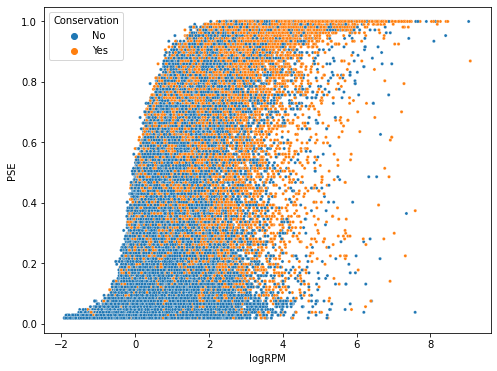

In [33]:
sns.scatterplot(data=df, x='logRPM', y='PSE', hue='Conservation', s=10)

<AxesSubplot:>

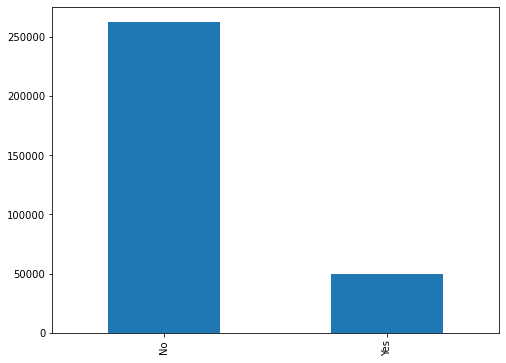

In [28]:
df['Conservation'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='logRPM', ylabel='PSE'>

/home/mumichae/miniconda3/envs/hail/lib/python3.7/site-packages/IPython/core/events.py:74: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/mumichae/miniconda3/envs/hail/lib/python3.7/site-packages/IPython/core/pylabtools.py:131: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


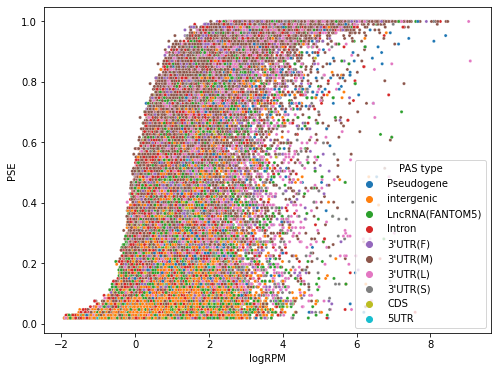

In [35]:
sns.scatterplot(data=df, x='logRPM', y='PSE', hue='PAS type', s=10, legend='brief')